In [84]:
library(igraph)
library(data.table)

In [ ]:
##MAKE SURE TO RUN Q9.IPYNB BEFORE RUNNING ANY OF THE FOLLOWING

In [85]:
load("g.RData")

In [86]:
load("fg1.RData")

In [87]:
load("moviemap.RData")

In [88]:
ratings = read.table("movie_rating_modified.txt",sep="\t")

In [89]:
nodes<-c("84869","86485","191381")
final_list<-list()
j<-1
for(nn in 1:3){
    nl<-neighbors(g,nodes[[nn]])
    communityno<-membership(fg1)[[nodes[[nn]]]]
    carr<-fg1[[communityno]]
    
    ratings_list<-list()
    
    i<-1
    ll<-c()
    for (v in nl){
        ll[[i]]<-vertex_attr(g,index=v)$name
        i<-i+1
    }
    i<-1
    common<-intersect(ll,carr)
    for(n in common){
        #if(i>10)
        #  break
        nm<-vertex_attr(g, index =n)$name
        moviename<-moviemap[[nm]]
        r<-subset(ratings,V1==moviename)$V2
        ratings_list[[i]]<-r
        i<-i+1
    }
    final_list[[j]]<-ratings_list
    j<-j+1
}


[1] 6.325543


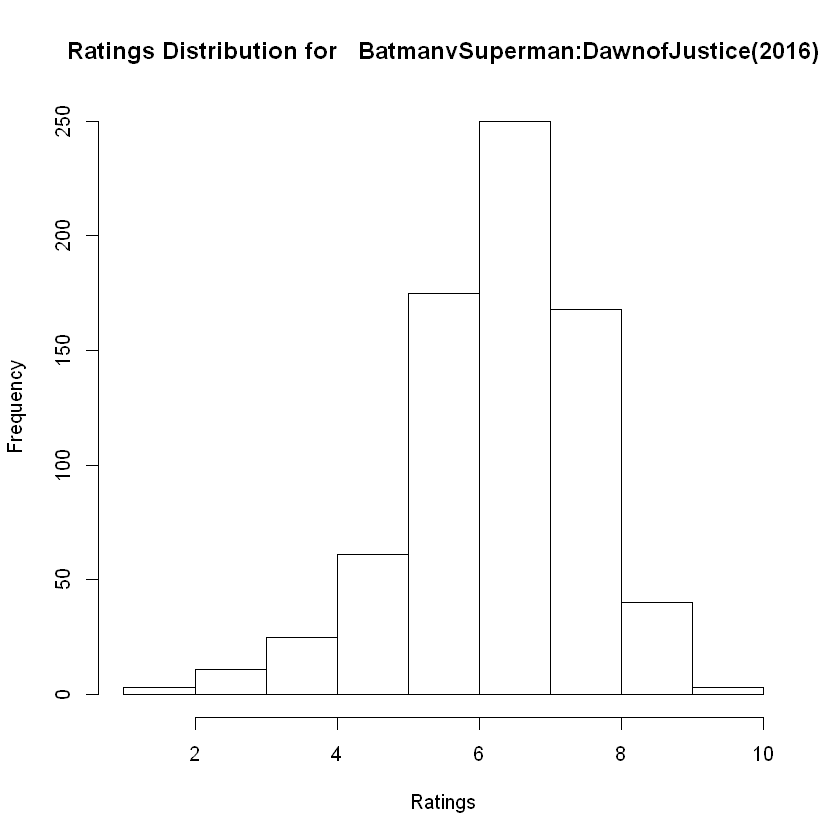

[1] 6.380831


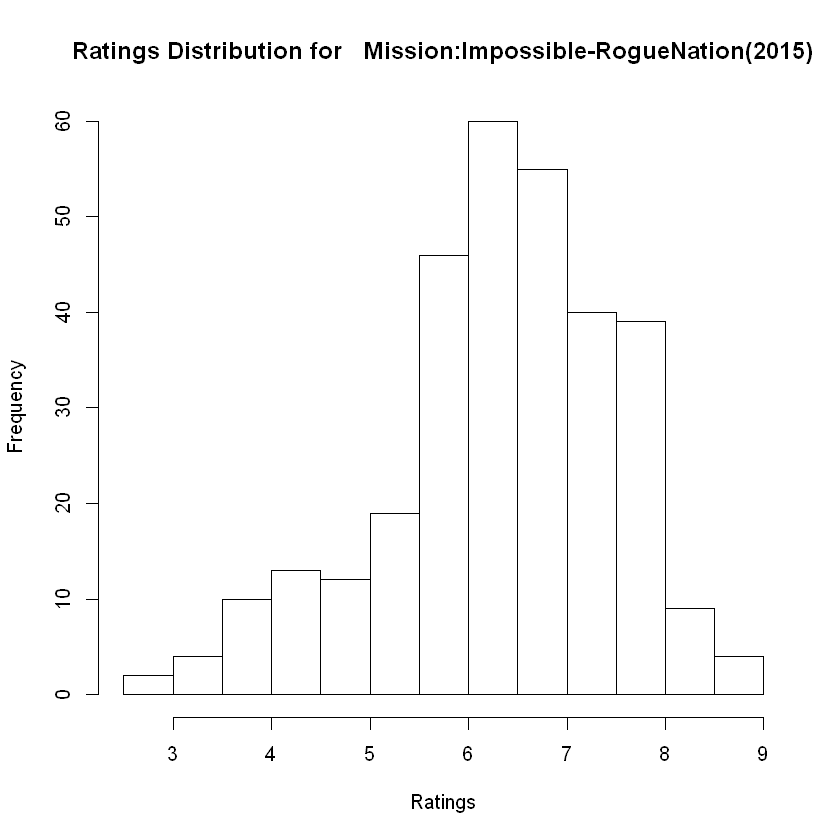

[1] 6.815686


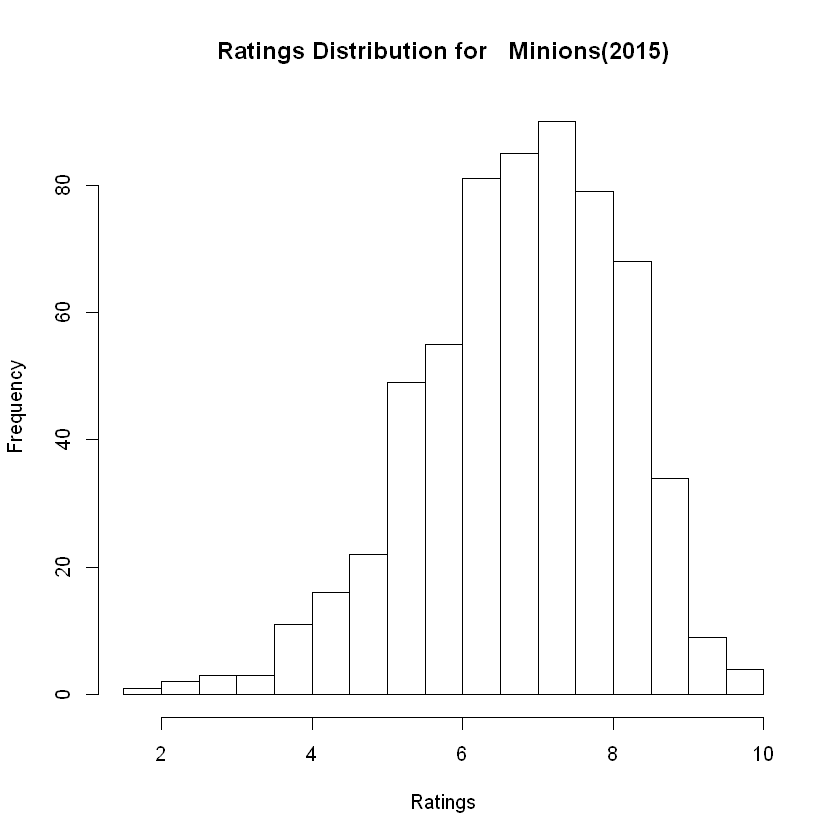

In [90]:
movie<-c("BatmanvSuperman:DawnofJustice(2016)","Mission:Impossible-RogueNation(2015)","Minions(2015)")
for(j in 1:3){
    tit1 <- paste("Ratings Distribution for  ",movie[[j]])
    hist(unlist(final_list[[j]]),xlab="Ratings",ylab="Frequency",main=tit1)
    print(mean(unlist(final_list[[j]])))
}

In [2]:
edgelistFile<-"imdb_edgelist.txt1"

In [3]:
alledges = fread(edgelistFile,header = FALSE, data.table = TRUE)
colnames(alledges) = c("n1", "n2", "weight")

In [91]:
nodes<-c("84869","86485","191381")
finalmem<-c()
topn<-c()
j<-1
for(nn in 1:3){
    e1<-alledges[which(alledges$"n1" == nodes[[nn]]| alledges$"n2" == nodes[[nn]]),]
    e2 =  e1[order(-e1$"weight"),]
    d<-data.frame(e2[2:6,])
    neigh<-c()
    cc<-c()
    for(i in 1:5){
        t<-d[i,which(d[i,1:2]!=nodes[[nn]])]
        neigh[[i]]<-as.character(t)
        cc[[i]]<-membership(fg1)[[as.character(t)]]
        
    }
    finalmem[[j]]<-cc
    topn[[j]]<-neigh
    j<-j+1
}

In [94]:
finalmem

[[1]]
[1] 2 2 2 2 2

[[2]]
[1] 8 8 8 8 2

[[3]]
[1] 2 2 2 2 2

In [95]:
topn

[[1]]
[1] "78298"  "190227" "42785"  "104679" "71216" 

[[2]]
[1] "168639" "107499" "108932" "26050"  "137438"

[[3]]
[1] "35468"  "46914"  "83371"  "194026" "115574"

In [99]:
for(i in 1:3){
    print("============")
    for(j in 1:5)
        print(moviemap[[topn[[i]][[j]]]])
}

[1] "============"
[1] "Eloise(2015)"
[1] "TheJusticeLeaguePartOne(2017)"
[1] "IntotheStorm(2014)"
[1] "LoveandHonor(2013)"
[1] "ManofSteel(2013)"
[1] "============"
[1] "Fan(2015)"
[1] "Phantom(2015)"
[1] "Suffragette(2015)"
[1] "BreakingtheBank(2014)"
[1] "NowYouSeeMe:TheSecondAct(2016)"
[1] "============"
[1] "TheLorax(2012)"
[1] "InsideOut(2015)"
[1] "Up(2009)"
[1] "SurfsUp(2007)"
[1] "DespicableMe2(2013)"
